In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submit.csv')

In [3]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


# reliable '0', or potentially fake '1'

In [4]:
#Filling Null Values with empty String
train = train.fillna('')
test=test.fillna('')


C:\Users\hr_21\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


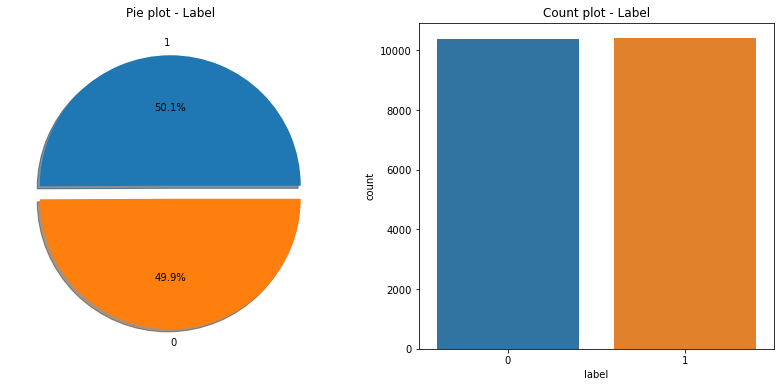

In [5]:
#Picture
f,ax = plt.subplots(1,2,figsize=(14,6))
train['label'].value_counts().plot.pie(explode=[0, 0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Label')
ax[0].set_ylabel('')
sns.countplot('label', data = train, ax=ax[1])
ax[1].set_title('Count plot - Label')
plt.show()

In [11]:
#For the model 1, only title and Author name will be used
train['total'] = train['title']+' '+train['author']
test['total']=test['title']+' '+test['author']


In [10]:
train['all_total'] = train['title']+' '+train['author'] + ' ' +train['text']
test['all_total']=test['title']+' '+test['author']+ ' ' +test['text']

In [15]:
y=train['label']
X = train['total']

In [16]:
X

0        House Dem Aide: We Didn’t Even See Comey’s Let...
1        FLYNN: Hillary Clinton, Big Woman on Campus - ...
2        Why the Truth Might Get You Fired Consortiumne...
3        15 Civilians Killed In Single US Airstrike Hav...
4        Iranian woman jailed for fictional unpublished...
                               ...                        
20795    Rapper T.I.: Trump a ’Poster Child For White S...
20796    N.F.L. Playoffs: Schedule, Matchups and Odds -...
20797    Macy’s Is Said to Receive Takeover Approach by...
20798    NATO, Russia To Hold Parallel Exercises In Bal...
20799              What Keeps the F-35 Alive David Swanson
Name: total, Length: 20800, dtype: object

In [17]:
import nltk
import re
from nltk.corpus import stopwords


In [18]:
voc_size = 6000
msg = X.copy()
msg_test = test.copy()


Using Stemming here Stemming map words to their root forms

In [19]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

### Cleaning Text
- Removed urls, emojis and punctuations
- Tokenized base text and title
- Lower cased clean text
- Removed stopwords
- Applying word Stemming
- Converted tokenized text to string again

In [20]:
for i in range(len(msg)):
    review = re.sub('[^a-zA-Z]',' ',msg[i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [21]:
corpus_test = []
for i in range(len(msg_test)):
    review = re.sub('[^a-zA-Z]',' ',msg_test['total'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_test.append(review)

In [22]:

from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

In [23]:
onehot_rep = [one_hot(words,voc_size)for words in corpus]
onehot_rep_test = [one_hot(words,voc_size)for words in corpus_test]

In [24]:
embedded_docs = pad_sequences(onehot_rep,padding='pre',maxlen=25)
embedded_docs_test = pad_sequences(onehot_rep_test,padding='pre',maxlen=25)

# Model Trainning

In [25]:
model = Sequential()
model.add(Embedding(voc_size,40,input_length=25))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
X_final = np.array(embedded_docs)
y_final = np.array(y)
test_final = np.array(embedded_docs_test)



In [27]:
history = model.fit(X_final,y_final,epochs=20,batch_size=64)

Epoch 1/20
325/325 [==============================] - 6s 15ms/step - loss: 0.3278 - accuracy: 0.8515
Epoch 2/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0171 - accuracy: 0.9952
Epoch 3/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0084 - accuracy: 0.9976
Epoch 4/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0039 - accuracy: 0.9988
Epoch 5/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 6/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0010 - accuracy: 0.9997
Epoch 7/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0028 - accuracy: 0.9991
Epoch 8/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 9/20
325/325 [==============================] - 5s 15ms/step - loss: 0.0011 - accuracy: 0.9995
Epoch 10/20
325/325 [==============================] - 5s 15ms/step - loss: 8.5034e-04 - ac

Text(0.5, 0, 'epoch')

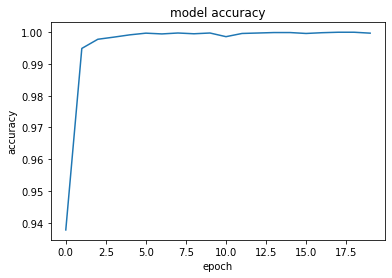

In [28]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [29]:
y_pred = model.predict_classes(test_final)

C:\Users\hr_21\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [30]:
submission['label'] = y_pred
submission.to_csv('submission.csv',index=False)
